In [1]:
pip install scikit-plot

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sys
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#np.set_printoptions(precision=6)
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import scikitplot as scplt
np.set_printoptions(precision=7)
# Set some options for printing all the columns
np.set_printoptions(precision = 7, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 10)

# Original data

In [ ]:
# import data
weather = pd.read_csv('/content/drive/MyDrive/Weather.csv')

In [ ]:
weather

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,wdird,wdire,vism,visi,pressurem,pressurei,windchillm,windchilli,heatindexm,heatindexi,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,40,NE,4.0,2.5,1018.2,30.07,6.6,43.9,NaN,NaN,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,0,Variable,6.4,4.0,1017.8,30.06,6.6,43.9,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,20,NNE,8.0,5.0,1017.0,30.04,7.1,44.8,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,0,Variable,12.9,8.0,1016.5,30.02,5.9,42.6,NaN,NaN,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,0,North,12.9,8.0,1016.7,30.03,NaN,NaN,NaN,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2016-12-31 19:51:00,6.1,43.0,-4.4,24.1,47.0,7.4,4.6,NaN,NaN,0,Variable,16.1,10.0,1013.8,29.94,4.6,40.3,NaN,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10477,2016-12-31 20:51:00,6.1,43.0,-4.4,24.1,47.0,13.0,8.1,38.9,24.2,240,WSW,16.1,10.0,1012.9,29.91,3.4,38.2,NaN,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10478,2016-12-31 21:51:00,6.1,43.0,-5.0,23.0,45.0,9.3,5.8,29.6,18.4,0,Variable,16.1,10.0,1012.5,29.90,4.2,39.5,NaN,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10479,2016-12-31 22:51:00,6.7,44.1,-5.0,23.0,43.0,14.8,9.2,NaN,NaN,240,WSW,16.1,10.0,1012.4,29.90,3.9,39.0,NaN,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
cols = weather.columns
for i in range(len(cols)):
  print(cols[i], ": ", weather[cols[i]].isna().sum())

pickup_datetime :  0
tempm :  5
tempi :  5
dewptm :  5
dewpti :  5
hum :  5
wspdm :  737
wspdi :  737
wgustm :  8605
wgusti :  8605
wdird :  0
wdire :  0
vism :  245
visi :  245
pressurem :  239
pressurei :  239
windchillm :  7775
windchilli :  7775
heatindexm :  9644
heatindexi :  9644
precipm :  8775
precipi :  8775
conds :  0
icon :  0
fog :  0
rain :  0
snow :  0
hail :  0
thunder :  0
tornado :  0


In [ ]:
weather.dtypes

In [ ]:
# drop columns with same information
cleaned_df = weather.drop(columns=['tempm', 'dewptm', 'wspdm', 'wdire', 'wgustm', 'vism', 'pressurem', 'windchillm', 'heatindexm', 'precipm'])

In [ ]:
# extract the time
datetime = pd.DataFrame()
datetime['year'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).year
datetime['month'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).month
datetime['day'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).day
datetime['hour'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).hour
datetime['minute'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).minute
cleaned_df = datetime.join(cleaned_df)
cleaned_df = cleaned_df.drop(columns=['pickup_datetime'])

In [ ]:
cleaned_df

,year,month,day,hour,minute,tempi,dewpti,hum,wspdi,wgusti,wdird,visi,pressurei,windchilli,heatindexi,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015,12,31,0,15,46.0,43.0,89.0,4.6,NaN,40,2.5,30.07,43.9,NaN,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015,12,31,0,42,46.0,43.0,89.0,4.6,NaN,0,4.0,30.06,43.9,NaN,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015,12,31,0,51,46.0,43.0,89.0,3.5,NaN,20,5.0,30.04,44.8,NaN,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015,12,31,1,51,45.0,42.1,90.0,4.6,NaN,0,8.0,30.02,42.6,NaN,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015,12,31,2,51,45.0,42.1,90.0,0.0,NaN,0,8.0,30.03,NaN,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2016,12,31,19,51,43.0,24.1,47.0,4.6,NaN,0,10.0,29.94,40.3,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10477,2016,12,31,20,51,43.0,24.1,47.0,8.1,24.2,240,10.0,29.91,38.2,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10478,2016,12,31,21,51,43.0,23.0,45.0,5.8,18.4,0,10.0,29.90,39.5,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10479,2016,12,31,22,51,44.1,23.0,43.0,9.2,NaN,240,10.0,29.90,39.0,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
cleaned_df['rain'].value_counts()

0    8793
1     945
Name: rain, dtype: int64

In [ ]:
col_drop = ['heatindexi', 'windchilli']
cleaned_df = cleaned_df.drop(columns=col_drop)

In [ ]:
missing_cols = ['wgusti', 'precipi'] # can fill na
cleaned_df[missing_cols] = cleaned_df[missing_cols].fillna(0)

In [ ]:
cols_dropna = ['tempm', 'dewptm', 'hum', 'wspdm', 'vism', 'pressurem'] # just drop na in these cols
cleaned_df = cleaned_df.dropna()

In [ ]:
WindChill = 35.74 + (0.6215 * cleaned_df['tempi']) - (35.75 * cleaned_df['wspdi']) + (0.4275 * cleaned_df['tempi'] * cleaned_df['wspdi'])
#wind_chill = cleaned_df['tempm'] - cleaned_df['wspdm'] * 0.7 

In [ ]:
# get dummy for categorical variable: wdire
cat_cols = ['wdire']
cat_data = pd.get_dummies(cleaned_df[cat_cols])

In [ ]:
pred_cols = ['conds', 'icon', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']
trainData = cleaned_df.drop(columns=pred_cols)
#trainData = trainData.drop(columns=['wdire']).join(cat_data)

In [ ]:
trainData = trainData.reset_index(drop=True)

In [ ]:
y = cleaned_df[['rain']]

In [ ]:
# shift the target variable so we use the previous 1 timestamp data to predict the next one
y_shifted = y.shift(-1)

In [ ]:
trainData = trainData[:-1]
y_shifted = y_shifted[:-1]

In [ ]:
lg = LogisticRegression(random_state=42)
lg.fit(trainData, y_shifted)
y_pred = lg.predict(trainData)
print("Accuracy:", lg.score(trainData, y_shifted))
print(metrics.accuracy_score(y_true=y_shifted, y_pred=y_pred))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9271849645681421
0.9271849645681421



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("The Classification table is", metrics.confusion_matrix(y_shifted, y_pred))
print(metrics.classification_report(y_shifted, y_pred))

The Classification table is [[8614  179]
 [ 530  414]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      8793
         1.0       0.70      0.44      0.54       944

    accuracy                           0.93      9737
   macro avg       0.82      0.71      0.75      9737
weighted avg       0.92      0.93      0.92      9737



In [ ]:
lg.predict_proba(trainData)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainData, y_shifted, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", logreg.score(X_test, y_test))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print()

Accuracy: 0.9260780287474333
0.9260780287474333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
import pickle
filename = "RainYN.sav"
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.6691958293939133

The Classification table is [[2581   54]
 [ 184  103]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2635
         1.0       0.66      0.36      0.46       287

    accuracy                           0.92      2922
   macro avg       0.79      0.67      0.71      2922
weighted avg       0.91      0.92      0.91      2922



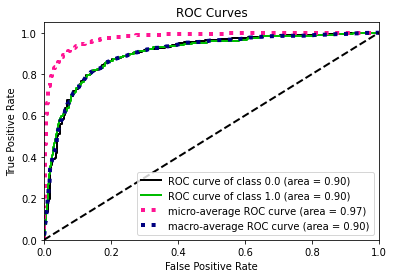

In [ ]:
predictions_test_prob = logreg.predict_proba(X_test)

print("The Classification table is", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test, predictions_test_prob)
plt.show()

In [ ]:
cor = cleaned_df.corr()

In [ ]:
col = cor.columns
for i in range(len(col)):
  colname = col[i]
  cor_tmp = abs(cor[colname])
  select_feat = cor_tmp[cor_tmp > 0.6]
  if len(select_feat) > 1:
    print(colname, ":")
    print(select_feat)
    print("--------------------------------")

tempi :
tempi     1.000000000
dewpti    0.875592787
Name: tempi, dtype: float64
--------------------------------
dewpti :
tempi     0.875592787
dewpti    1.000000000
Name: dewpti, dtype: float64
--------------------------------
hum :
hum     1.0000000000
visi    0.6633301062
Name: hum, dtype: float64
--------------------------------
wspdi :
wspdi     1.0000000000
wgusti    0.6282566414
Name: wspdi, dtype: float64
--------------------------------
wgusti :
wspdi     0.6282566414
wgusti    1.0000000000
Name: wgusti, dtype: float64
--------------------------------
visi :
hum     0.6633301062
visi    1.0000000000
rain    0.6159519859
Name: visi, dtype: float64
--------------------------------
rain :
visi    0.6159519859
rain    1.0000000000
Name: rain, dtype: float64
--------------------------------


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", dt.score(X_test, y_test))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print()

Accuracy: 0.919917864476386
0.919917864476386



The Classification table is [[2520  115]
 [ 119  168]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      2635
         1.0       0.59      0.59      0.59       287

    accuracy                           0.92      2922
   macro avg       0.77      0.77      0.77      2922
weighted avg       0.92      0.92      0.92      2922



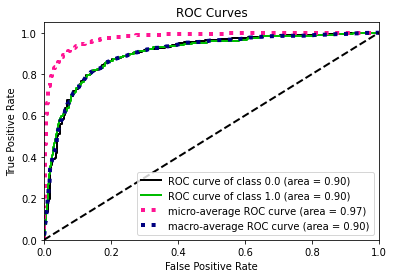

In [ ]:
predictions_test_prob = logreg.predict_proba(X_test)

print("The Classification table is", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test, predictions_test_prob)
plt.show()

# New data

In [7]:
# import data
weather_new = pd.read_csv('/content/drive/MyDrive/working_data_new.csv')

In [8]:
weather_new

,date_hour,dewpti,dewptm,heatindexi,heatindexm,hum,precipi,precipm,pressurei,pressurem,rain,snow,tempi,tempm,visi,vism,wdird,wgusti,wgustm,windchilli,windchillm,wspdi,wspdm
0,2015-12-31 00:00:00,43.00,6.1,0.0,0.0,89.0,0.027,0.7,30.057,1017.667,1,0,46.0,7.800,3.833,6.133,20.000,0.0,0.0,44.200,6.767,4.233,6.800
1,2015-12-31 01:00:00,42.10,5.6,0.0,0.0,90.0,0.010,0.3,30.020,1016.500,0,0,45.0,7.200,8.000,12.900,0.000,0.0,0.0,42.600,5.900,4.600,7.400
2,2015-12-31 02:00:00,42.10,5.6,0.0,0.0,90.0,0.000,0.0,30.030,1016.700,0,0,45.0,7.200,8.000,12.900,0.000,0.0,0.0,0.000,0.000,0.000,0.000
3,2015-12-31 03:00:00,41.00,5.0,0.0,0.0,87.0,0.000,0.0,30.023,1016.633,0,0,44.7,7.033,8.333,13.433,203.333,0.0,0.0,28.033,3.733,3.067,4.933
4,2015-12-31 04:00:00,41.55,5.3,0.0,0.0,88.0,0.000,0.0,30.020,1016.500,0,0,45.0,7.200,8.000,12.900,275.000,0.0,0.0,43.500,6.400,3.500,5.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,2016-12-31 19:00:00,24.10,-4.4,0.0,0.0,47.0,0.000,0.0,29.940,1013.800,0,0,43.0,6.100,10.000,16.100,0.000,0.0,0.0,40.300,4.600,4.600,7.400
8204,2016-12-31 20:00:00,24.10,-4.4,0.0,0.0,47.0,0.000,0.0,29.910,1012.900,0,0,43.0,6.100,10.000,16.100,240.000,24.2,38.9,38.200,3.400,8.100,13.000
8205,2016-12-31 21:00:00,23.00,-5.0,0.0,0.0,45.0,0.000,0.0,29.900,1012.500,0,0,43.0,6.100,10.000,16.100,0.000,18.4,29.6,39.500,4.200,5.800,9.300
8206,2016-12-31 22:00:00,23.00,-5.0,0.0,0.0,43.0,0.000,0.0,29.900,1012.400,0,0,44.1,6.700,10.000,16.100,240.000,0.0,0.0,39.000,3.900,9.200,14.800


In [9]:
# drop columns with same information
cleaned_df = weather_new.drop(columns=['tempm', 'dewptm', 'wspdm', 'wgustm', 'vism', 'pressurem', 'windchillm', 'heatindexm', 'precipm'])

In [ ]:
cleaned_df

,date_hour,dewpti,heatindexi,hum,precipi,pressurei,rain,tempi,visi,wdird,wgusti,windchilli,wspdi
0,2015-12-31 00:00:00,43.00,0.0,89.0,0.027,30.057,1,46.0,3.833,20.000,0.0,44.200,4.233
1,2015-12-31 01:00:00,42.10,0.0,90.0,0.010,30.020,0,45.0,8.000,0.000,0.0,42.600,4.600
2,2015-12-31 02:00:00,42.10,0.0,90.0,0.000,30.030,0,45.0,8.000,0.000,0.0,0.000,0.000
3,2015-12-31 03:00:00,41.00,0.0,87.0,0.000,30.023,0,44.7,8.333,203.333,0.0,28.033,3.067
4,2015-12-31 04:00:00,41.55,0.0,88.0,0.000,30.020,0,45.0,8.000,275.000,0.0,43.500,3.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,2016-12-31 19:00:00,24.10,0.0,47.0,0.000,29.940,0,43.0,10.000,0.000,0.0,40.300,4.600
8204,2016-12-31 20:00:00,24.10,0.0,47.0,0.000,29.910,0,43.0,10.000,240.000,24.2,38.200,8.100
8205,2016-12-31 21:00:00,23.00,0.0,45.0,0.000,29.900,0,43.0,10.000,0.000,18.4,39.500,5.800
8206,2016-12-31 22:00:00,23.00,0.0,43.0,0.000,29.900,0,44.1,10.000,240.000,0.0,39.000,9.200


In [10]:
# extract the time
datetime = pd.DataFrame()
datetime['year'] = pd.DatetimeIndex(cleaned_df['date_hour']).year
datetime['month'] = pd.DatetimeIndex(cleaned_df['date_hour']).month
datetime['day'] = pd.DatetimeIndex(cleaned_df['date_hour']).day
datetime['hour'] = pd.DatetimeIndex(cleaned_df['date_hour']).hour
#datetime['minute'] = pd.DatetimeIndex(cleaned_df['pickup_datetime']).minute
cleaned_df = datetime.join(cleaned_df)
cleaned_df = cleaned_df.drop(columns=['date_hour'])

In [ ]:
cleaned_df

,year,month,day,hour,dewpti,heatindexi,hum,precipi,pressurei,rain,tempi,visi,wdird,wgusti,windchilli,wspdi
0,2015,12,31,0,43.00,0.0,89.0,0.027,30.057,1,46.0,3.833,20.000,0.0,44.200,4.233
1,2015,12,31,1,42.10,0.0,90.0,0.010,30.020,0,45.0,8.000,0.000,0.0,42.600,4.600
2,2015,12,31,2,42.10,0.0,90.0,0.000,30.030,0,45.0,8.000,0.000,0.0,0.000,0.000
3,2015,12,31,3,41.00,0.0,87.0,0.000,30.023,0,44.7,8.333,203.333,0.0,28.033,3.067
4,2015,12,31,4,41.55,0.0,88.0,0.000,30.020,0,45.0,8.000,275.000,0.0,43.500,3.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,2016,12,31,19,24.10,0.0,47.0,0.000,29.940,0,43.0,10.000,0.000,0.0,40.300,4.600
8204,2016,12,31,20,24.10,0.0,47.0,0.000,29.910,0,43.0,10.000,240.000,24.2,38.200,8.100
8205,2016,12,31,21,23.00,0.0,45.0,0.000,29.900,0,43.0,10.000,0.000,18.4,39.500,5.800
8206,2016,12,31,22,23.00,0.0,43.0,0.000,29.900,0,44.1,10.000,240.000,0.0,39.000,9.200


In [11]:
col_drop = ['heatindexi', 'windchilli']
cleaned_df = cleaned_df.drop(columns=col_drop)
missing_cols = ['wgusti', 'precipi'] # can fill na
cleaned_df[missing_cols] = cleaned_df[missing_cols].fillna(0)

cols_dropna = ['tempm', 'dewptm', 'hum', 'wspdm', 'vism', 'pressurem'] # just drop na in these cols
cleaned_df = cleaned_df.dropna()

#pred_cols = ['conds', 'icon', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']
trainData = cleaned_df.drop(columns=['rain', 'snow'])
#trainData = trainData.drop(columns=['wdire']).join(cat_data)
trainData = trainData.reset_index(drop=True)

y = cleaned_df[['rain']]

# shift the target variable so we use the previous 1 timestamp data to predict the next one
y_shifted = y.shift(-1)

trainData = trainData[:-1]
y_shifted = y_shifted[:-1]

In [43]:
cleaned_df['precipi'].describe()

count    8208.0000000000
mean        0.0034604045
std         0.0220245749
min         0.0000000000
25%         0.0000000000
50%         0.0000000000
75%         0.0000000000
max         0.5080000000
Name: precipi, dtype: float64

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_new1, y_new1 = sm.fit_resample(trainData, y_shifted)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, y_new1, test_size=0.3, random_state=42)

In [13]:
X_train

,year,month,day,hour,dewpti,hum,precipi,pressurei,tempi,visi,wdird,wgusti,wspdi
7530,2016,12,1,18,28.0,70.0,0.000,29.650,37.0,10.00,0.000,0.0,0.000
3428,2016,6,5,20,46.9,89.0,0.000,29.800,50.0,5.00,90.000,0.0,8.100
1580,2016,3,9,20,55.9,63.0,0.000,30.150,69.1,10.00,0.000,0.0,4.600
4668,2016,7,30,12,68.0,67.0,0.000,30.010,80.1,6.00,70.000,0.0,5.800
2206,2016,4,7,22,66.9,93.0,0.015,29.955,69.1,2.75,100.000,0.0,1.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2016,9,16,22,52.0,67.0,0.000,30.290,63.0,10.00,180.000,0.0,5.800
5191,2016,8,23,7,48.9,56.0,0.000,30.310,64.9,10.00,0.000,0.0,3.500
5390,2016,9,1,14,39.3,77.0,0.000,30.143,46.0,8.00,63.333,0.0,10.367
860,2016,2,7,20,52.4,47.0,0.000,30.040,74.0,10.00,270.000,0.0,9.600


In [32]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", logreg.score(X_test, y_test))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8204413970430684
0.8204413970430684



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The Classification table is [[1967  393]
 [ 445 1862]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      2360
         1.0       0.83      0.81      0.82      2307

    accuracy                           0.82      4667
   macro avg       0.82      0.82      0.82      4667
weighted avg       0.82      0.82      0.82      4667



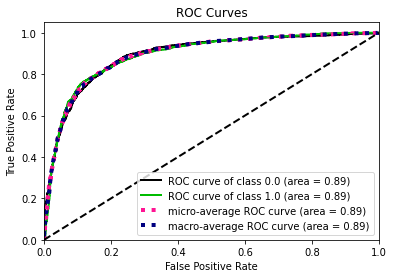

In [33]:
predictions_test_prob = logreg.predict_proba(X_test)

print("The Classification table is", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test, predictions_test_prob)
plt.show()

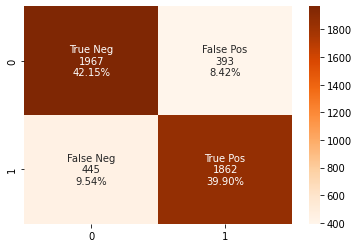

In [41]:
cf_matrix_train = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train, annot=labels, fmt='', cmap='Oranges')

In [34]:
import pickle
filename = "RainYN.sav"
pickle.dump(logreg, open(filename, 'wb'))

## predict snow

In [14]:
y2 = cleaned_df[['snow']]

# shift the target variable so we use the previous 1 timestamp data to predict the next one
y_shifted2 = y2.shift(-1)

y_shifted2 = y_shifted2[:-1]

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(trainData, y_shifted2)

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [28]:
logreg2 = LogisticRegression(random_state=42)
logreg2.fit(X_train2, y_train2)
y_pred2 = logreg2.predict(X_test2)
print("Accuracy:", logreg2.score(X_test2, y_test2))
print(metrics.accuracy_score(y_true=y_test2, y_pred=y_pred2))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9318275154004106
0.9318275154004106



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The Classification table is [[2288  154]
 [ 178 2250]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2442
         1.0       0.94      0.93      0.93      2428

    accuracy                           0.93      4870
   macro avg       0.93      0.93      0.93      4870
weighted avg       0.93      0.93      0.93      4870



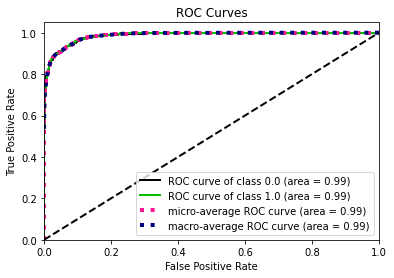

In [29]:
predictions_test_prob2 = logreg2.predict_proba(X_test2)

print("The Classification table is", metrics.confusion_matrix(y_test2, y_pred2))
print(metrics.classification_report(y_test2, y_pred2))

fpr, tpr, tholds = metrics.roc_curve(y_test2, predictions_test_prob2[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test2, predictions_test_prob2)
plt.show()

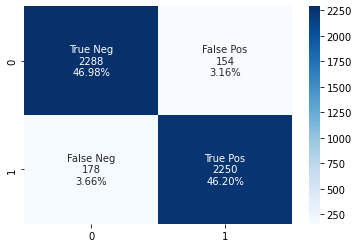

In [39]:
cf_matrix_train2 = metrics.confusion_matrix(y_test2, y_pred2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_train2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_train2.flatten()/np.sum(cf_matrix_train2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train2, annot=labels, fmt='', cmap='Blues')

In [35]:
import pickle
filename = "SnowYN.sav"
pickle.dump(logreg2, open(filename, 'wb'))